## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

## Load Data

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
numVar = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
catVar = data[['species']]

In [8]:
catVar = catVar.apply(LabelEncoder().fit_transform)

In [9]:
data = pd.concat([numVar, catVar.reset_index(drop = True)], axis = 1)

## Data Analyzing

In [10]:
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


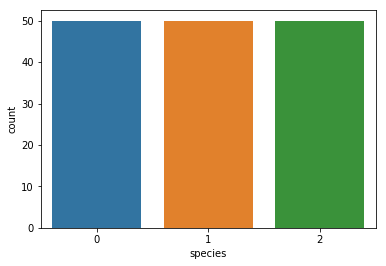

In [12]:
sb.countplot(x = 'species', data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244276ADAC8>,
      dtype=object)

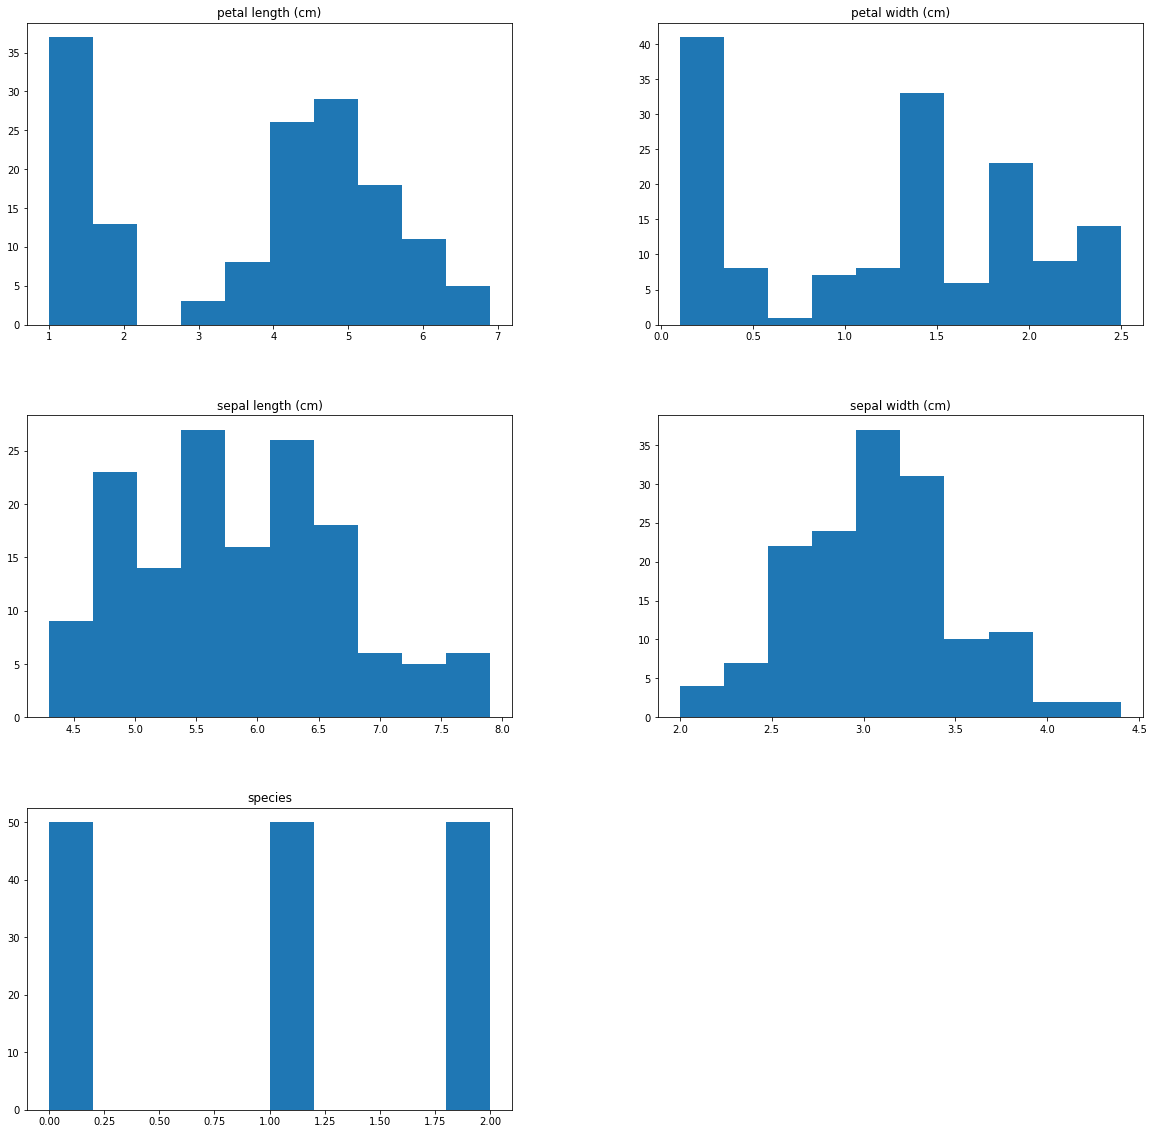

In [13]:
data.hist(bins = 10, figsize = (20, 20), grid = False)

In [14]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Data Split

In [15]:
X = data.drop('species', axis = 1)
y = data.species
print(X.head(2))
print('\n\n')
print(y.head(2))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2



0    0
1    0
Name: species, dtype: int32


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Train the Classifier and Predict

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RFModel = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [20]:
RFModelFit = RFModel.fit(X_train, y_train)

In [21]:
RFModelPredict = RFModel.predict(X_test)

## Evaluation


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Classification Report

In [23]:
print(classification_report(RFModelPredict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.86      0.89        14
           2       0.86      0.92      0.89        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### Confusion Matrix

In [24]:
print(confusion_matrix(RFModelPredict, y_test))

[[18  0  0]
 [ 0 12  2]
 [ 0  1 12]]


### Accuracy

In [25]:
print(accuracy_score(RFModelPredict, y_test))

0.9333333333333333
